## Todos
- Make a pull request/reopen that one issue
- PRF fit -- extract stellar/source flux? if so, you can multiply the 1d lightcurve by the stellar flux 

In [148]:
%matplotlib inline
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np


In [149]:
# %matplotlib inline
# import numpy as np
# from lightkurve import KeplerTargetPixelFile, LightCurve
# from lightkurve.prf import StarPrior, BackgroundPrior, FocusPrior, MotionPrior, TPFModel, PRFPhotometry
# from oktopus import GaussianPrior, UniformPrior

# tpf = KeplerTargetPixelFile("https://archive.stsci.edu/missions/kepler/target_pixel_files/0084/008462852/"
#                             "kplr008462852-2013098041711_lpd-targ.fits.gz", quality_mask='hardest')

# # First, compute a few values from our TPF which will inform the priors
# bgflux = np.nanpercentile(tpf.flux[0], 10)
# maxflux = np.nansum(tpf.flux, axis=(1, 2)).max()
# # col, row = np.nanmedian(tpf.centroids(), axis=1)
# col, row = 50,50

In [150]:
# # Set up the model
# model = TPFModel(star_priors=[StarPrior(col=GaussianPrior(mean=col, var=2**2),
#                                         row=GaussianPrior(mean=row, var=2**2),
#                                         flux=UniformPrior(lb=0, ub=maxflux),
#                                         targetid=tpf.keplerid)],
#                  background_prior=BackgroundPrior(flux=GaussianPrior(mean=bgflux, var=bgflux)),
#                  focus_prior=FocusPrior(scale_col=GaussianPrior(mean=1, var=0.0001),
#                                         scale_row=GaussianPrior(mean=1, var=0.0001),
#                                         rotation_angle=UniformPrior(lb=-3.1415, ub=3.1415)),
#                  motion_prior=MotionPrior(shift_col=GaussianPrior(mean=0., var=0.01),
#                                           shift_row=GaussianPrior(mean=0., var=0.01)),
#                  prfmodel=tpf.get_prf_model(),
#                  fit_background=True,
#                  fit_focus=False,
#                  fit_motion=False)

# pp = PRFPhotometry(model)
# pp.run(tpf.flux, pos_corr1=tpf.pos_corr1, pos_corr2=tpf.pos_corr2, cadences=range(1650, 1850))
# pp.plot_results()
# print('The star flux in the first cadence is {}'.format(pp.results[0].stars[0].flux))

In [151]:
# # Set up the model
# model = TPFModel(star_priors=[StarPrior(col=GaussianPrior(mean=col, var=2**2),
#                                         row=GaussianPrior(mean=row, var=2**2),
#                                         flux=UniformPrior(lb=0, ub=maxflux),
#                                         targetid=tpf.keplerid)],
#                  background_prior=BackgroundPrior(flux=GaussianPrior(mean=bgflux, var=bgflux)),
#                  focus_prior=FocusPrior(scale_col=GaussianPrior(mean=1, var=0.0001),
#                                         scale_row=GaussianPrior(mean=1, var=0.0001),
#                                         rotation_angle=UniformPrior(lb=-3.1415, ub=3.1415)),
#                  motion_prior=MotionPrior(shift_col=GaussianPrior(mean=0., var=0.01),
#                                           shift_row=GaussianPrior(mean=0., var=0.01)),
#                  prfmodel=tpf.get_prf_model(),
#                  fit_background=True,
#                  fit_focus=False,
#                  fit_motion=False)

# pp = PRFPhotometry(model)
# pp.run(tpf.flux, pos_corr1=tpf.pos_corr1, pos_corr2=tpf.pos_corr2, cadences=range(1650, 1850))
# pp.plot_results()
# print('The star flux in the first cadence is {}'.format(pp.results[0].stars[0].flux))

In [152]:
# # Here's Keaton's PRF implementation for comparison
# #!pip install TESS_PRF #Run once
# import PRF

# # Suppose the following for a TPF of interest
# cam = 1
# ccd = 1
# sector = 13
# colnum = 107 #middle of TPF
# rownum = 1007 #middle of TPF

# prf = PRF.TESS_PRF(cam,ccd,sector,colnum,rownum)

# # See what this looks like in the center of an 11x11 TPF
# resampled = prf.locate(6.0, 6.0, (13,13))

# plt.imshow(np.log10(resampled),origin='lower')
# plt.show()

# plt.imshow(prf.prf)

In [153]:
# from lightkurve.prf import KeplerPRF
# kepprf = KeplerPRF(channel=45, shape=(10, 10), column=6, row=6)
# prf = kepprf(flux=1, center_col=10, center_row=10, scale_row=0.7, 
#              scale_col=0.7, rotation_angle=math.pi/2)
# plt.imshow(prf, origin='lower')
# plt.colorbar()

In [154]:
# from lightkurve.prf import KeplerPRF
# kepprf = KeplerPRF(channel=45, shape=(10, 10), column=6, row=6)
# prf = kepprf(flux=50000, center_col=10, center_row=10, scale_row=0.7, 
#              scale_col=0.7, rotation_angle=math.pi/2)
# plt.imshow(prf, origin='lower')
# plt.colorbar()

In [155]:
%matplotlib inline
import numpy as np
from lightkurve import KeplerTargetPixelFile, LightCurve
from lightkurve.prf import StarPrior, BackgroundPrior, FocusPrior, MotionPrior, TPFModel, PRFPhotometry
from oktopus import GaussianPrior, UniformPrior

tpf = KeplerTargetPixelFile("https://archive.stsci.edu/missions/kepler/target_pixel_files/0084/008462852/"
                            "kplr008462852-2013098041711_lpd-targ.fits.gz", quality_mask='hardest')

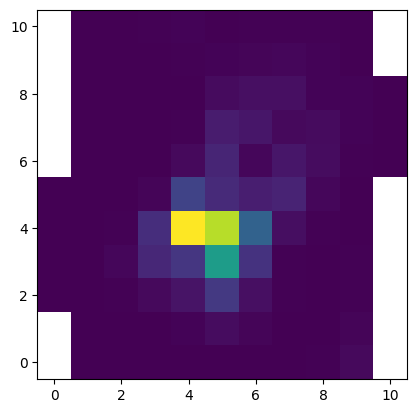

In [156]:
plt.imshow(np.array(tpf.flux[0]), origin='lower')

In [157]:
# t, f = tpf.to_lightcurve(method='aperture').time, tpf.to_lightcurve(method='aperture').flux

<Axes: title={'center': 'Target ID: 8462852, Cadence: 66713'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

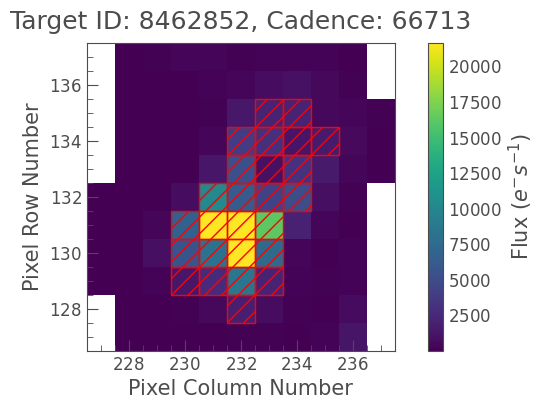

In [158]:
tpf.plot(aperture_mask=tpf.pipeline_mask)

In [159]:
apers = []

for cadence in range(len(tpf.flux)):
    aper = tpf.pipeline_mask * np.array(tpf.flux[cadence])
    apers.append(aper)
    
apers = np.array(apers)

In [160]:
import batman
import matplotlib.pyplot as plt

params = batman.TransitParams()       #object to store transit parameters
params.t0 = 0.                        #time of inferior conjunction
params.per = 1.                       #orbital period
params.rp = 1.                       #planet radius (in units of stellar radii)
params.a = 15.                        #semi-major axis (in units of stellar radii)
params.inc = 87.                      #orbital inclination (in degrees)
params.ecc = 0.                       #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)
params.limb_dark = "nonlinear"        #limb darkening model
params.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients [u1, u2, u3, u4]

t = np.linspace(-0.025, 0.025, len(apers))  #times at which to calculate light curve
m = batman.TransitModel(params, t)    #initializes model

b_flux = m.light_curve(params)

In [161]:
tpftransit = []

for fp in range(len(b_flux)):
    tpftransit.append(apers[fp]*b_flux[fp])

### Nick said: he had a functional form for the PSF, e.g. a Gaussian. He multiplied the FFI by the 1D light curve and scaled by the Gaussian PSF -- at the center mutliplied at full scale, at the tails multiplied by minimum scale

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


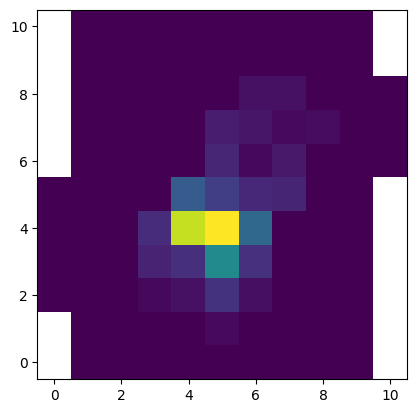

In [162]:
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
    
# duration of the video
duration = 20

# matplot subplot
fig, ax = plt.subplots()

# method to get frames
def make_frame(t):

    # clear
    ax.clear()
    # plotting line
    x = int(t * 20)
    ax.imshow(tpftransit[x], origin='lower', vmin=0, vmax=50000)

    # returning numpy image
    return mplfig_to_npimage(fig)

# creating animation
animation = VideoClip(make_frame, duration = duration)
animation.ipython_display(fps=177)


In [ ]:
def 

In [89]:
oops = tpf.extract_prf_photometry()

Fitting cadences: 100%|██████████████████████████████████████████| 3540/3540 [02:26<00:00, 24.11it/s]


In [232]:
oops.results[0].stars[0].flux = 0

In [233]:
oops.results[0]

  <StarParameters(
    col=232.46966094957332
    row=131.78401736836238
    flux=0
    targetid=None)>
  <BackgroundParameters(
    flux=459.8533634264026
    fitted=True)>
  <FocusParameters(
    scale_col=[1]
    scale_row=[1]
    rotation_angle=[0.]
    fitted=False)>
  <MotionParameters(
    shift_col=-0.0883256271481514
    shift_row=-0.22839058935642242
    fitted=False)>
  residual_image:
    [          nan -135.24134612 -147.49296708 -156.02464029...
  predicted_image:
    [445.36797008 447.74369597 464.58992143 477.12763711...

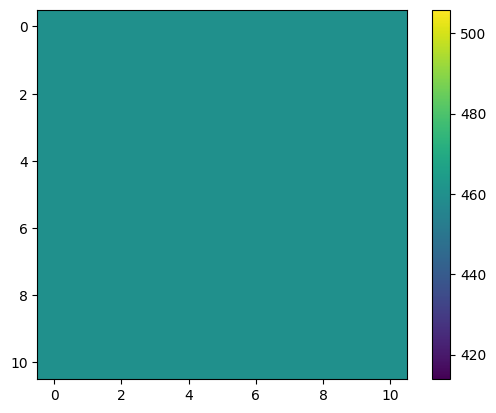

In [234]:
plt.imshow(oops.model.predict(params=oops.results[0]))
plt.colorbar()

In [235]:
StarParameters(
    col=232.46966094957332
    row=131.78401736836238
    flux=5000.46629568693
    targetid=None)>
  <BackgroundParameters(
    flux=459.8533634264026
    fitted=True)>
  <FocusParameters(
    scale_col=[1]
    scale_row=[1]
    rotation_angle=[0.]
    fitted=False)>
  <MotionParameters(
    shift_col=-0.0883256271481514
    shift_row=-0.22839058935642242
    fitted=False)>

SyntaxError: invalid syntax (995213991.py, line 3)

AttributeError: 'KeplerTargetPixelFile' object has no attribute 'predict'

In [144]:
oops.results[0]['StarParameters']

TypeError: 'TPFModelParameters' object is not subscriptable

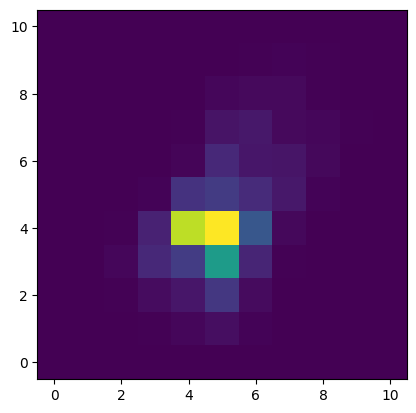

In [140]:
plt.imshow(oops.results[0].predicted_image, origin='lower')

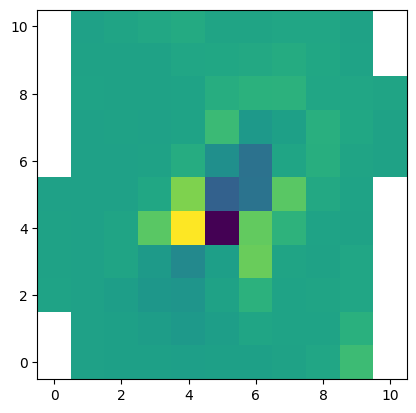

In [141]:
plt.imshow(oops.results[0].residual_image, origin='lower')

In [118]:
img_extent = (
                tpf.column - 0.5,
                tpf.column + tpf.shape[2] - 0.5,
                tpf.row - 0.5,
                tpf.row + tpf.shape[1] - 0.5,
            )

In [119]:
tpf = KeplerTargetPixelFile("https://archive.stsci.edu/missions/kepler/target_pixel_files/0084/008462852/"
                            "kplr008462852-2013098041711_lpd-targ.fits.gz", quality_mask='hardest')

In [125]:
tpf.column-(11/2)

221.5

<Axes: title={'center': 'Target ID: 8462852, Cadence: 66713'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

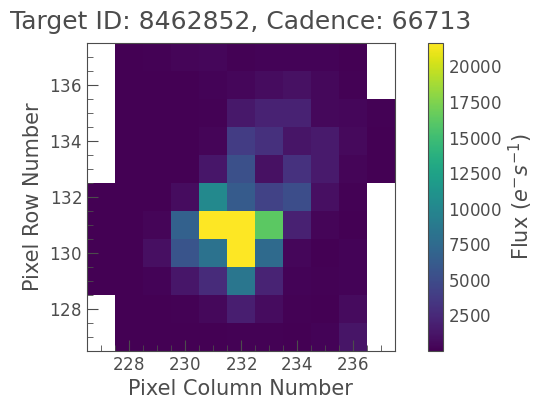

In [120]:
tpf.plot()

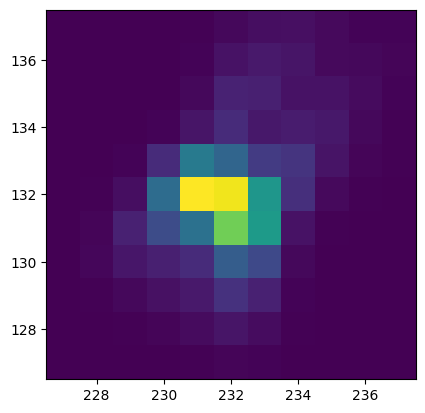

In [126]:
im = prf(center_col=tpf.column+(11/2), center_row=tpf.row+(11/2), flux=1, 
    scale_row=0.7, scale_col=0.7, rotation_angle=0);

plt.imshow(im, origin='lower', extent=img_extent)

In [236]:
def inject(tpf, tmodflux):
    """For one star"""

    oops = tpf.extract_prf_photometry()

    for i in range(len(oops.results)):
        oops.results[i].stars[0].flux = oops.results[i].stars[0].flux*tmodflux[i]

    return oops

In [238]:
oops2 = inject(tpf, b_flux)

Fitting cadences: 100%|██████████████████████████████████████████| 3540/3540 [03:54<00:00, 15.07it/s]


In [245]:
oops.model.predict(params=oops.results[0])

array([[459.85336343, 459.85336343, 459.85336343, 459.85336343,
        459.85336343, 459.85336343, 459.85336343, 459.85336343,
        459.85336343, 459.85336343, 459.85336343],
       [459.85336343, 459.85336343, 459.85336343, 459.85336343,
        459.85336343, 459.85336343, 459.85336343, 459.85336343,
        459.85336343, 459.85336343, 459.85336343],
       [459.85336343, 459.85336343, 459.85336343, 459.85336343,
        459.85336343, 459.85336343, 459.85336343, 459.85336343,
        459.85336343, 459.85336343, 459.85336343],
       [459.85336343, 459.85336343, 459.85336343, 459.85336343,
        459.85336343, 459.85336343, 459.85336343, 459.85336343,
        459.85336343, 459.85336343, 459.85336343],
       [459.85336343, 459.85336343, 459.85336343, 459.85336343,
        459.85336343, 459.85336343, 459.85336343, 459.85336343,
        459.85336343, 459.85336343, 459.85336343],
       [459.85336343, 459.85336343, 459.85336343, 459.85336343,
        459.85336343, 459.85336343, 459.8